# Concatenating a gridded rainfall dataset into a time series

:::{eval-rst}
:opticon:`tag`
:badge:`Wildfires,badge-primary`
:badge:`Preprocessing,badge-secondary`
:::

[![RoHub - FAIR Executable Research Object](https://img.shields.io/badge/RoHub-FAIR_Executable_Research_Object-2ea44f?logo=Open+Access&logoColor=blue)](https://w3id.org/ro-id/1b8921af-e77f-4ccf-ae38-4813cdceba0f)

## Context
### Purpose
To load and extract a region of interest from a gridded rainfall dataset, and concatenate into a time series using the [Iris package](https://scitools-iris.readthedocs.io/en/stable/).

### Preprocessing description
Time series data allows us to carry out a wide range of analyses including but not limited to trend, seasonality, anomaly detection and causality. As most of the climatological datasets are gridded, we provide a general tool to preprocess them into time series. The example global dataset from NCEP/NCAR reanalysis has a fairly low resolution (T62 Gaussian grid or approximately 1.9 * 1.9 degrees lat/long) which allows easy execution. It is openly available with a variety of atmospheric variables at near surface levels in daily and monthly frequencies as well as long-term monthly mean in NetCDF format, which is described in and can be obtained from [this landing page](https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.surfaceflux.html). 

This notebook uses a single sample data file for global daily precipitation rate (monthly mean) included with the notebook.

### Highlights
* Data for the entire globe is loaded and plotted using Iris
* Seasonal means are created by aggregating the data
* The Indonesian Borneo region is extracted and plotted
* The area-averaged time series for Indonesian Borneo region is created 
* A particular season and timeframe are extracted from the time series

### Contributions

#### Notebook
* Timothy Lam (author), University of Exeter, [@timo0thy](https://github.com/timo0thy)
* Marlene Kretschmer (author), University of Reading, [@MarleneKretschmer](https://github.com/MarleneKretschmer)
* Samantha Adams (author), Met Office Informatics Lab, [@svadams](https://github.com/svadams)
* Rachel Prudden (author), Met Office Informatics Lab, [@RPrudden](https://github.com/RPrudden)
* Elena Saggioro (author), University of Reading, [@ESaggioro](https://github.com/ESaggioro)
* Nick (reviewer), The Alan Turing Institute, [@](https://github.com/)

#### Dataset originator/creator
* NOAA National Center for Environmental Prediction (creator)

#### Dataset authors
* Eugenia Kalnay, Director, NCEP Environmental Modeling Center

#### Dataset documentation
```{bibliography}
  :style: plain
  :list: bullet
  :filter: topic % "wildfires_preprocessing_rainfall_timeseries"
```

:::{note}
Note this data should be used only for non-commercial purposes.
:::

## Install and load libraries

In [1]:
import os
import iris
import iris.quickplot as qplt
import iris.coord_categorisation as coord_cat

import numpy as np
import matplotlib.pyplot as plt

import urllib.request

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

## Set project structure

In [2]:
notebook_folder = './wildfires-preprocessing-timeseries_Borneo'
if not os.path.exists(notebook_folder):
    os.makedirs(notebook_folder)

## Retrieve and/or load a sample data file

In [3]:
filepath = 'https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis.derived/surface_gauss/'
filename = 'prate.sfc.mon.mean.nc'

if not os.path.exists(notebook_folder+'/'+filename):
    urllib.request.urlretrieve(filepath+filename, os.path.join(notebook_folder, filename))
    
# use 'intake' package to download data, just in case the link changes and the old one no longer works...

In [4]:
# Load monthly precipitation data into an iris cube
precip = iris.load_cube(os.path.join(notebook_folder, filename), 'Monthly Mean of Precipitation Rate')
precip.coord('latitude').guess_bounds()
precip.coord('longitude').guess_bounds()

In [5]:
print (precip[0].data)

[[1.9127938e-06 1.8837651e-06 1.8515068e-06 ... 2.1256988e-06
  2.0418272e-06 1.9708589e-06]
 [2.2246593e-07 2.2246593e-07 2.0311094e-07 ... 2.7407921e-07
  2.3536924e-07 2.1601426e-07]
 [4.9547411e-06 5.2644209e-06 5.5482942e-06 ... 3.5902260e-06
  4.0482864e-06 4.5257093e-06]
 ...
 [1.3031156e-06 1.9547335e-06 3.2999012e-06 ... 5.3214569e-07
  6.9988891e-07 9.3214874e-07]
 [2.3708619e-06 2.6902153e-06 3.0805372e-06 ... 1.6289207e-06
  1.8547289e-06 2.0805371e-06]
 [3.1837712e-06 3.3386111e-06 3.5515161e-06 ... 2.7773165e-06
  2.8805432e-06 3.0482863e-06]]


## Visualisation

Here we use the Iris wrapper to matplotlib pyplot to plot the gridded data with added coastline.

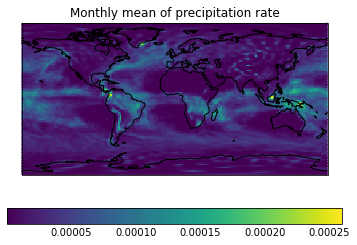

In [6]:
qplt.pcolormesh(precip[0]) # plot the first time in the cube
plt.gca().coastlines()

## Create seasonal means

Here we construct seasonal means from the monthly data for each grid, for the purpose of extracting a particular season of interest later on.

In [7]:
# Add auxiliary coordinates to the cube to indicate each season
coord_cat.add_season(precip, 'time', name='clim_season')
coord_cat.add_season_year(precip, 'time', name='season_year')

In [8]:
print(precip)

Monthly Mean of Precipitation Rate / (unknown) (time: 892; latitude: 94; longitude: 192)
    Dimension coordinates:
        time                                        x              -              -
        latitude                                    -              x              -
        longitude                                   -              -              x
    Auxiliary coordinates:
        clim_season                                 x              -              -
        season_year                                 x              -              -
    Attributes:
        Conventions                            'COARDS'
        NCO                                    '20121013'
        References                             'http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.htm...
        actual_range                           array([-2.3283064e-10, 5.8903999e-04], dtype=float32)
        dataset                                'NCEP Reanalysis Derived Products'
   

In [9]:
# Aggregate by season
annual_seasonal_mean = precip.aggregated_by(
    ['clim_season', 'season_year'],
    iris.analysis.MEAN)

In [10]:
# Check this worked
for season, year in zip(
    annual_seasonal_mean.coord('clim_season')[:10].points,
    annual_seasonal_mean.coord('season_year')[:10].points):
    print(season + ' ' + str(year))

djf 1948
mam 1948
jja 1948
son 1948
djf 1949
mam 1949
jja 1949
son 1949
djf 1950
mam 1950


## Extract Borneo region

Here we extract our area of study which covers the Indonesian Borneo region, as specified by Melendy et al. (2014) (available at https://daac.ornl.gov/CMS/guides/CMS_LiDAR_Indonesia.html). 

In [11]:
# Create a constraint for the latitude and Longitude extents

Borneo_lat = iris.Constraint(latitude=lambda v: v > -4.757 and v <= 3.211 )
Borneo_lon = iris.Constraint(longitude=lambda v: v > 107.815 and v <= 117.987 )

# Extract data based on the spatial extent
Borneo =  annual_seasonal_mean.extract(Borneo_lat & Borneo_lon) 

Monthly Mean of Precipitation Rate / (unknown) (time: 298; latitude: 4; longitude: 5)
    Dimension coordinates:
        time                                        x              -             -
        latitude                                    -              x             -
        longitude                                   -              -             x
    Auxiliary coordinates:
        clim_season                                 x              -             -
        season_year                                 x              -             -
    Cell methods:
        mean                                   clim_season, season_year
    Attributes:
        Conventions                            'COARDS'
        NCO                                    '20121013'
        References                             'http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.htm...
        actual_range                           array([-2.3283064e-10, 5.8903999e-04], dtype=float32)
   

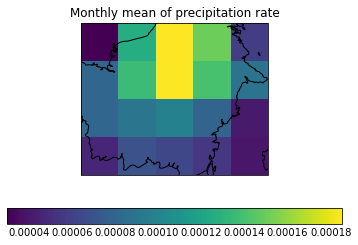

In [12]:
# Plot data of the first season in the study region
print(Borneo)
qplt.pcolormesh(Borneo[0]) # plot the first timestep in the cube
plt.gca().coastlines()

## Create area-averaged time series

To construct a seasonal rainfall time series for the study region, we first compute the areal average rainfall.

In [13]:
# Create area-weights array
grid_area_weights = iris.analysis.cartography.area_weights(Borneo)

# Perform the area-weighted mean using the computed grid-box areas.
Borneo_mean = Borneo.collapsed(['latitude', 'longitude'],
                                iris.analysis.MEAN,
                                weights=grid_area_weights)

We then extract the temporal timescale of interest (Boreal Summers from 1950 - 2019).

In [14]:
jja_constraint = iris.Constraint(clim_season='jja')
year_constraint = iris.Constraint(season_year=lambda v: v > 1949 and v <= 2019 )

Borneo_jja = Borneo_mean.extract(jja_constraint & year_constraint)
print(Borneo_jja)

Monthly Mean of Precipitation Rate / (unknown) (time: 70)
    Dimension coordinates:
        time                                        x
    Auxiliary coordinates:
        clim_season                                 x
        season_year                                 x
    Scalar coordinates:
        latitude                               0.0 degrees, bound=(-3.80947, 3.80947) degrees
        longitude                              114.375 degrees, bound=(109.6875, 119.0625) degrees
    Cell methods:
        mean                                   clim_season, season_year
        mean                                   latitude, longitude
    Attributes:
        Conventions                            'COARDS'
        NCO                                    '20121013'
        References                             'http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.htm...
        actual_range                           array([-2.3283064e-10, 5.8903999e-04], dtype=float32)


Finally, we use the Iris wrapper to matplotlib pyplot to plot the time series generated.

Text(0.5, 1.0, 'Borneo JJA Precip')

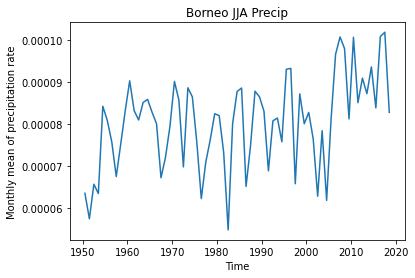

In [15]:
qplt.plot(Borneo_jja[-71:-1])
plt.title('Borneo JJA Precip')

### Save as a new NetCDF file

In [16]:
iris.save(Borneo_jja, os.path.join(notebook_folder, 'Borneo_precip_mean.nc'))

## Summary

This notebook has demonstrated the use of the Iris package to easily load, plot and manipulate gridded environmental NetCDF data.

## Citing this Notebook

Timothy Lam, Marlene Kretschmer, Samantha Adams, Rachel Prudden, Elena Saggioro, and XXX. "Concatenating a gridded rainfall dataset into a time series (Jupyter Notebook) published in the Environmental Data Science book." ROHub.  XXX, XX,2022. Available at <link>.

## Additional information

**License**: The code in this notebook is licensed under the MIT License. The Environmental Data Science book is licensed under the Creative Commons by Attribution 4.0 license. See further details [here](https://github.com/alan-turing-institute/environmental-ds-book/blob/master/LICENSE.md).

**Contact**: If you have any suggestion or report an issue with this notebook, feel free to [create an issue](https://github.com/alan-turing-institute/environmental-ds-book/issues/new/choose) or send a direct message to [environmental.ds.book@gmail.com](mailto:environmental.ds.book@gmail.com).

In [17]:
from datetime import date
print(f'Last tested: {date.today()}')

Last tested: 2022-05-30
